# Seminar - Dask


In [69]:
from dask.distributed import Client

In [70]:
client = Client(n_workers=4,memory_limit='2GB')
client

C:\Users\Martin Hronec\Miniconda3\lib\site-packages\distributed\node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 55916 instead
  http_address["port"], self.http_server.port


Client Scheduler: tcp://127.0.0.1:55919 Dashboard: http://127.0.0.1:55916/status,Cluster Workers: 4 Cores: 8 Memory: 8.00 GB


## `dask.bag`

### Arxiv data 

In [32]:
import json
import dask
import dask.dataframe as dd
import dask.bag as db

In [62]:
mybag = db.read_text('../dask_data/arxiv/arxiv-metadata-oai-snapshot.json').map(json.loads)

In [34]:
mybag

dask.bag<loads, npartitions=1>

In [35]:
mybag.take(2)

({'id': '0704.0001',
  'submitter': 'Pavel Nadolsky',
  'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan",
  'title': 'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies',
  'comments': '37 pages, 15 figures; published version',
  'journal-ref': 'Phys.Rev.D76:013009,2007',
  'doi': '10.1103/PhysRevD.76.013009',
  'report-no': 'ANL-HEP-PR-07-12',
  'categories': 'hep-ph',
  'license': None,
  'abstract': '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with d

In [11]:
mybag.filter(lambda record: 'Jozef Barunik' in record['authors']).take(1)  

({'id': '1201.1535',
  'submitter': 'Jozef Barunik',
  'authors': 'Jozef Barunik, Tomaso Aste, Tiziana Di Matteo, Ruipeng Liu',
  'title': 'Understanding the source of multifractality in financial markets',
  'comments': None,
  'journal-ref': 'Physica A, 391 (17), pp. 4234-4251 (2012)',
  'doi': '10.1016/j.physa.2012.03.037',
  'report-no': None,
  'categories': 'q-fin.ST',
  'license': 'http://arxiv.org/licenses/nonexclusive-distrib/1.0/',
  'abstract': '  In this paper, we use the generalized Hurst exponent approach to study the\nmulti- scaling behavior of different financial time series. We show that this\napproach is robust and powerful in detecting different types of multiscaling.\nWe observe a puzzling phenomenon where an apparent increase in multifractality\nis measured in time series generated from shuffled returns, where all\ntime-correlations are destroyed, while the return distributions are conserved.\nThis effect is robust and it is reproduced in several real financial dat

In [39]:
barunik_papers = mybag.filter(lambda record: 'Jozef Barunik' in record['authors'])

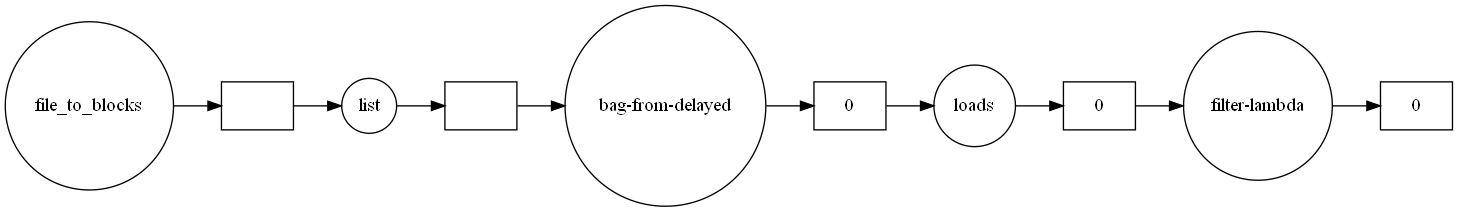

In [40]:
barunik_papers.visualize(rankdir='LR')

In [14]:
mybag.count().compute()

1796911

In [27]:
result = (mybag.filter(lambda record: 'Jozef Barunik' in record['authors'])
           .filter(lambda record: 'portfolio' in record['abstract'])
           .map(lambda x: len(x['abstract']))
         )
result

dask.bag<lambda, npartitions=1>

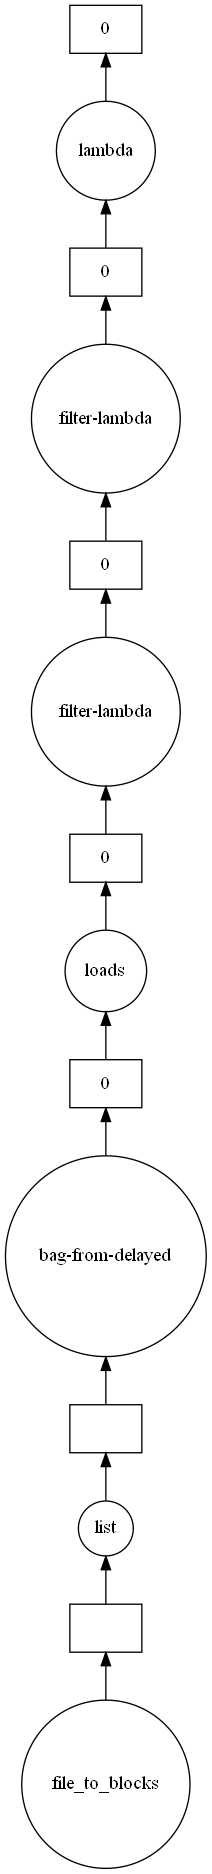

In [29]:
result.visualize()

## `dask.DataFrame`

* [Jane Street Capital dataset](https://www.kaggle.com/c/jane-street-market-prediction/data)

In [71]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

In [72]:
df = dd.read_csv('../dask_data/jane_street_capital/train.csv')

In [73]:
df

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
npartitions=97,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [74]:
df.head()

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4


In [75]:
df.columns

Index(['date', 'weight', 'resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp',
       'feature_0', 'feature_1', 'feature_2',
       ...
       'feature_121', 'feature_122', 'feature_123', 'feature_124',
       'feature_125', 'feature_126', 'feature_127', 'feature_128',
       'feature_129', 'ts_id'],
      dtype='object', length=138)

In [46]:
description = df['date'].describe()

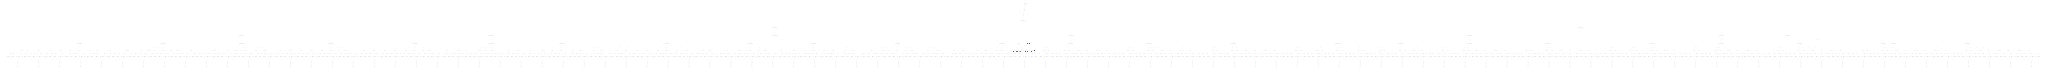

In [47]:
description.visualize(filename='description.svg')

In [76]:
df['date'].describe().compute()

count    2.390491e+06
mean     2.478668e+02
std      1.522746e+02
min      0.000000e+00
25%      1.040000e+02
50%      2.530000e+02
75%      3.820000e+02
max      4.990000e+02
Name: date, dtype: float64

In [77]:
df['resp']

Dask Series Structure:
npartitions=97
    float64
        ...
     ...   
        ...
        ...
Name: resp, dtype: float64
Dask Name: getitem, 194 tasks

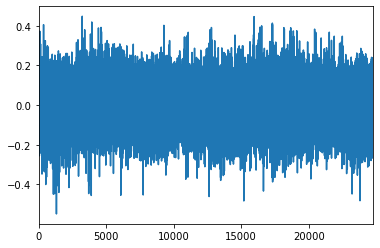

In [78]:
df['resp'].compute().plot()

In [79]:
df[df.columns[['feature' in c for c in df.columns]]].describe().compute()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129
count,2.390491e+06,2.390491e+06,2.390491e+06,2.390043e+06,2.390043e+06,2.390491e+06,2.390491e+06,1.997356e+06,1.997356e+06,2.389703e+06,...,2.320637e+06,2.320637e+06,2.390268e+06,2.390268e+06,2.374408e+06,2.374408e+06,2.381638e+06,2.381638e+06,2.388570e+06,2.388570e+06
mean,9.838565e-03,3.855776e-01,3.576875e-01,8.919166e-03,4.150056e-03,-3.714619e-03,-1.258924e-02,5.177655e-02,2.682810e-02,2.488133e-01,...,3.351270e-01,2.687757e-01,3.435523e-01,2.799973e-01,3.351537e-01,2.448752e-01,3.391778e-01,2.323809e-01,3.425608e-01,2.456182e-01
std,9.999518e-01,2.559373e+00,2.477335e+00,1.939333e+00,1.751113e+00,1.734077e+00,1.684336e+00,1.768331e+00,2.026105e+00,2.400612e+00,...,1.906376e+00,2.174238e+00,2.087842e+00,1.977643e+00,1.742587e+00,2.242853e+00,2.534498e+00,1.795854e+00,2.307130e+00,1.765419e+00
min,-1.000000e+00,-3.172026e+00,-3.093182e+00,-2.542465e+01,-1.911880e+01,-3.252228e+01,-4.073895e+01,-2.815943e+01,-4.188122e+01,-1.615690e+02,...,-4.883486e+00,-7.471971e+00,-5.862979e+00,-6.029281e+00,-4.080720e+00,-8.136407e+00,-8.215050e+00,-5.765982e+00,-7.024909e+00,-5.282181e+00
25%,-1.000000e+00,-1.081156e+00,-8.463168e-01,-8.211134e-01,-7.407156e-01,-6.726326e-01,-6.839261e-01,-6.130829e-01,-7.961252e-01,-9.813807e-01,...,-5.288776e-01,-4.348687e-01,-4.922820e-01,-3.020230e-01,-4.819022e-01,-4.636889e-01,-6.963745e-01,-3.389302e-01,-5.759368e-01,-3.002505e-01
50%,1.000000e+00,3.086135e-01,4.516099e-01,1.119114e-01,1.298875e-01,1.459938e-01,1.724078e-01,2.889563e-01,1.913920e-01,4.185295e-01,...,5.454169e-01,6.976426e-01,5.909613e-01,8.141187e-01,5.141557e-01,7.341796e-01,7.557915e-01,6.092915e-01,6.711848e-01,6.715085e-01
75%,1.000000e+00,2.251799e+00,2.156386e+00,2.022573e+00,1.867158e+00,2.766140e+00,2.556594e+00,1.728434e+00,1.760262e+00,2.345367e+00,...,2.110298e+00,2.394934e+00,2.242184e+00,2.131182e+00,1.946983e+00,2.431821e+00,2.778890e+00,1.973098e+00,2.493442e+00,1.904207e+00
max,1.000000e+00,7.442989e+01,1.480763e+02,2.587166e+01,1.942177e+01,3.274220e+01,4.582157e+01,3.300261e+01,4.068199e+01,1.574156e+02,...,6.573832e+01,1.107771e+02,4.812516e+01,1.276908e+02,6.514517e+01,7.052807e+01,5.872849e+01,6.932221e+01,5.119038e+01,1.164568e+02


In [80]:
df.head(10)

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4
5,0,0.000000,-0.001047,-0.002700,0.000743,0.004667,0.001282,-1,-1.499681,-1.928023,...,NaN,0.337112,4.079450,0.613967,6.622410,0.799525,5.231833,0.360831,3.922324,5
6,0,0.190575,-0.001939,-0.002301,0.001088,0.005963,0.000709,-1,-3.172026,-3.093182,...,NaN,0.336873,4.076447,0.614783,6.622176,0.800618,5.231595,0.361506,3.921714,6
7,0,3.820844,0.017395,0.021361,0.031163,0.036970,0.033473,-1,0.446050,-0.466210,...,NaN,2.101997,4.846202,1.479875,5.261328,2.305066,4.571762,2.201537,4.429745,7
8,0,0.116557,-0.005460,-0.007301,-0.009085,-0.003546,-0.001677,1,-3.172026,-3.093182,...,NaN,1.537913,4.785838,1.637435,6.968002,2.354338,5.825499,1.778029,4.740577,8
9,0,0.160117,0.005976,0.004345,0.023712,0.035360,0.020317,1,2.744408,1.412127,...,NaN,1.796860,3.177064,0.999252,2.906432,1.589816,2.435999,1.472419,2.245991,9


In [81]:
df['date'].min().compute()

0

In [82]:
df['date'].max().compute()

499

In [83]:
df['ts_id'].max().compute()

2390490

In [87]:
df['action'] = 0

In [97]:
#date_specific =  df.groupby('date')
#p = (date_specific[['weight','resp','action']]).prod(axis=1).sum()

TypeError: prod() got an unexpected keyword argument 'axis'

In [96]:
# p.compute()

weight    0.000000e+00
resp      1.876558e-99
action    0.000000e+00
dtype: float64